In [1]:
from cgi import test
import torch
from torch import nn
from torch import distributions
from torch.nn.parameter import Parameter

import numpy as np
import time
import os
import matplotlib.pyplot as plt

from model.rnvp import *
from data.electricity import *
from model.solver import *

In [3]:
solver = CCNF('electricity', batch_size=64, length=168, pred_len=24, hidden=1024, gpu=1, gpu_idx=1, save_path = './checkpoints')

Correlation estimation progress...
Correlation estimated.
Enforcing pd for correlation matrix...
Pd enforced.


In [4]:
model = solver.getbestmodel()

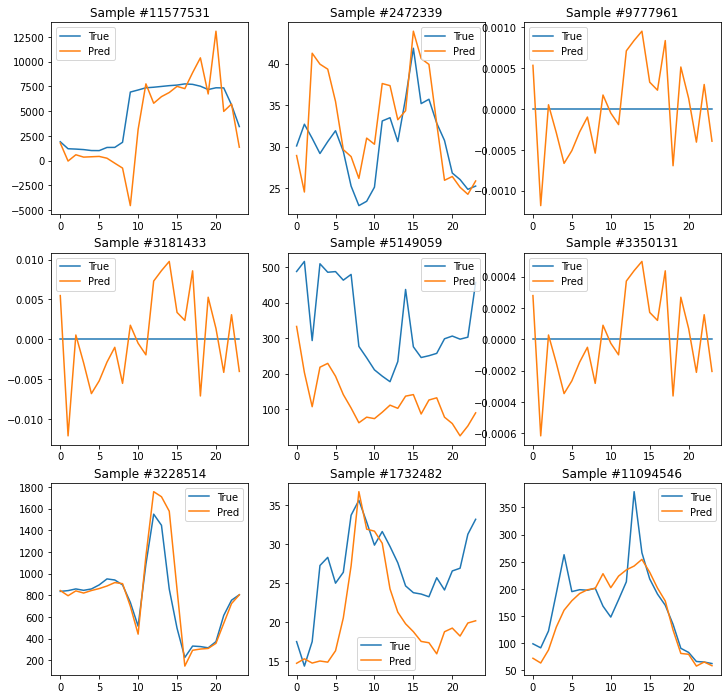

In [10]:
indcs = np.random.choice(range(solver.test_loader.dataset.__len__()), size = 9)

fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for i, ax in enumerate(axs.flat):
    (k, x, y) = solver.test_loader.dataset.__getitem__(indcs[i])
    x, y = torch.tensor(x).to('cuda:1').unsqueeze(0), torch.tensor(y).to('cuda:1').unsqueeze(0)
    _, _, _, y_pred = model.g(x, y)
    y, y_pred = solver.data.unscale([k], y), solver.data.unscale([k], y_pred)

    ax.set_title('Sample #{}'.format(indcs[i]))
    ax.plot(y.cpu()[0], label='True')
    ax.plot(y_pred.detach().cpu()[0], label='Pred')
    ax.legend()

plt.show()